In [1]:
import sys

# add path to core
sys.path.append("../../core/")

from parse import *
from connectivity import *
from plot_tools import *
from physical_block import *
from ode_system import ODESystem
from bdf import BDF1, BDF2
from problem_data import ProblemData
from bcmanager import BCManager
import matplotlib.pyplot as plt
from rc_calculator import RCCalculator
from scipy.integrate import simps

In [2]:
# problem data
pd = ProblemData()
coronary = "right"
fdr = "./"

In [3]:
# geometric processing
paths = parse_vessels(fdr)
chunks, bifurcations, connectivity = build_slices(paths, pd.tol, pd.maxlength)

In [4]:
# calculate resistance and capacitance
coeff_resistance = 0.8
coeff_capacitance = 0.3
rc = RCCalculator(fdr, coronary, coeff_resistance, coeff_capacitance)
rc.assign_resistances_to_outlets(chunks, connectivity)
rc.assign_capacitances_to_outlets(chunks, connectivity)

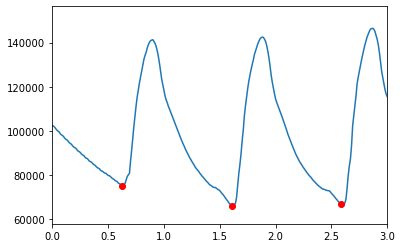

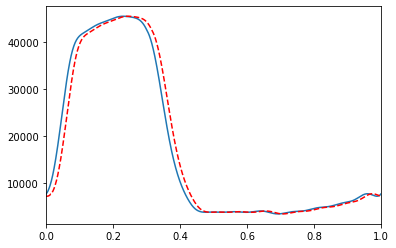

In [5]:
# create physical blocks and boundary conditions
blocks = create_physical_blocks(chunks, model_type = 'Windkessel2', problem_data = pd)
bcmanager = BCManager(chunks, connectivity,
                      inletbc_type = "pressure",
                      outletbc_type = "coronary",
                      folder = fdr,
                      problem_data = pd,
                      coronary = coronary,
                      distal_pressure_coeff = 0.54,
                      distal_pressure_shift = 15)

In [6]:
# create ode system and time marching algorithm
ode_system = ODESystem(blocks, connectivity, bcmanager)
bdf = BDF2(ode_system, connectivity, pd, bcmanager)

In [7]:
# solve problem
solutions, times = bdf.run()

Solving t = -2.00 s
Solving t = -1.99 s
Solving t = -1.99 s
Solving t = -1.98 s
Solving t = -1.98 s
Solving t = -1.97 s
Solving t = -1.97 s
Solving t = -1.96 s
Solving t = -1.96 s
Solving t = -1.95 s
Solving t = -1.95 s
Solving t = -1.94 s
Solving t = -1.94 s
Solving t = -1.93 s
Solving t = -1.93 s
Solving t = -1.92 s
Solving t = -1.92 s
Solving t = -1.91 s
Solving t = -1.91 s
Solving t = -1.90 s
Solving t = -1.90 s
Solving t = -1.89 s
Solving t = -1.89 s
Solving t = -1.88 s
Solving t = -1.88 s
Solving t = -1.87 s
Solving t = -1.87 s
Solving t = -1.86 s
Solving t = -1.86 s
Solving t = -1.85 s
Solving t = -1.85 s
Solving t = -1.84 s
Solving t = -1.84 s
Solving t = -1.83 s
Solving t = -1.83 s
Solving t = -1.82 s
Solving t = -1.82 s
Solving t = -1.81 s
Solving t = -1.81 s
Solving t = -1.80 s
Solving t = -1.80 s
Solving t = -1.79 s
Solving t = -1.79 s
Solving t = -1.78 s
Solving t = -1.78 s
Solving t = -1.77 s
Solving t = -1.77 s
Solving t = -1.76 s
Solving t = -1.76 s
Solving t = -1.75 s


Solving t = 0.08 s
Solving t = 0.08 s
Solving t = 0.09 s
Solving t = 0.09 s
Solving t = 0.10 s
Solving t = 0.10 s
Solving t = 0.11 s
Solving t = 0.11 s
Solving t = 0.12 s
Solving t = 0.12 s
Solving t = 0.13 s
Solving t = 0.13 s
Solving t = 0.14 s
Solving t = 0.14 s
Solving t = 0.15 s
Solving t = 0.15 s
Solving t = 0.16 s
Solving t = 0.16 s
Solving t = 0.17 s
Solving t = 0.17 s
Solving t = 0.18 s
Solving t = 0.18 s
Solving t = 0.19 s
Solving t = 0.19 s
Solving t = 0.20 s
Solving t = 0.20 s
Solving t = 0.21 s
Solving t = 0.21 s
Solving t = 0.22 s
Solving t = 0.22 s
Solving t = 0.23 s
Solving t = 0.23 s
Solving t = 0.24 s
Solving t = 0.24 s
Solving t = 0.25 s
Solving t = 0.25 s
Solving t = 0.26 s
Solving t = 0.26 s
Solving t = 0.27 s
Solving t = 0.27 s
Solving t = 0.28 s
Solving t = 0.28 s
Solving t = 0.29 s
Solving t = 0.29 s
Solving t = 0.30 s
Solving t = 0.30 s
Solving t = 0.31 s
Solving t = 0.31 s
Solving t = 0.32 s
Solving t = 0.32 s
Solving t = 0.33 s
Solving t = 0.33 s
Solving t = 

Solving t = 4.23 s
Solving t = 4.23 s
Solving t = 4.24 s
Solving t = 4.24 s
Solving t = 4.25 s
Solving t = 4.25 s
Solving t = 4.26 s
Solving t = 4.26 s
Solving t = 4.27 s
Solving t = 4.27 s
Solving t = 4.28 s
Solving t = 4.28 s
Solving t = 4.29 s
Solving t = 4.29 s
Solving t = 4.30 s
Solving t = 4.30 s
Solving t = 4.31 s
Solving t = 4.31 s
Solving t = 4.32 s
Solving t = 4.32 s
Solving t = 4.33 s
Solving t = 4.33 s
Solving t = 4.34 s
Solving t = 4.34 s
Solving t = 4.35 s
Solving t = 4.35 s
Solving t = 4.36 s
Solving t = 4.36 s
Solving t = 4.37 s
Solving t = 4.37 s
Solving t = 4.38 s
Solving t = 4.38 s
Solving t = 4.39 s
Solving t = 4.39 s
Solving t = 4.40 s
Solving t = 4.40 s
Solving t = 4.41 s
Solving t = 4.41 s
Solving t = 4.42 s
Solving t = 4.42 s
Solving t = 4.43 s
Solving t = 4.43 s
Solving t = 4.44 s
Solving t = 4.44 s
Solving t = 4.45 s
Solving t = 4.45 s
Solving t = 4.46 s
Solving t = 4.46 s
Solving t = 4.47 s
Solving t = 4.47 s
Solving t = 4.48 s
Solving t = 4.48 s
Solving t = 

Solving t = 8.65 s
Solving t = 8.66 s
Solving t = 8.66 s
Solving t = 8.67 s
Solving t = 8.67 s
Solving t = 8.68 s
Solving t = 8.68 s
Solving t = 8.69 s
Solving t = 8.69 s
Solving t = 8.70 s
Solving t = 8.70 s
Solving t = 8.71 s
Solving t = 8.71 s
Solving t = 8.72 s
Solving t = 8.72 s
Solving t = 8.73 s
Solving t = 8.73 s
Solving t = 8.74 s
Solving t = 8.74 s
Solving t = 8.75 s
Solving t = 8.75 s
Solving t = 8.76 s
Solving t = 8.76 s
Solving t = 8.77 s
Solving t = 8.77 s
Solving t = 8.78 s
Solving t = 8.78 s
Solving t = 8.79 s
Solving t = 8.79 s
Solving t = 8.80 s
Solving t = 8.80 s
Solving t = 8.81 s
Solving t = 8.81 s
Solving t = 8.82 s
Solving t = 8.82 s
Solving t = 8.83 s
Solving t = 8.83 s
Solving t = 8.84 s
Solving t = 8.84 s
Solving t = 8.85 s
Solving t = 8.85 s
Solving t = 8.86 s
Solving t = 8.86 s
Solving t = 8.87 s
Solving t = 8.87 s
Solving t = 8.88 s
Solving t = 8.88 s
Solving t = 8.89 s
Solving t = 8.89 s
Solving t = 8.90 s
Solving t = 8.90 s
Solving t = 8.91 s
Solving t = 

(0.6, 1.4)

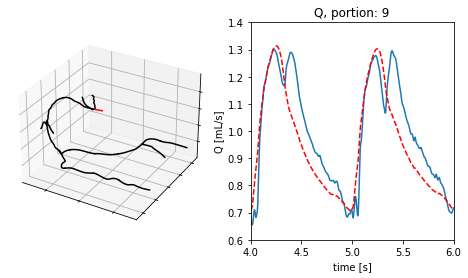

In [8]:
# plot inlet flowrate and scaled inlet pressure
fig, ax1, ax2 = plot_solution(solutions, times, pd.t0, pd.T, chunks, 9, 'Q')
ax2.plot(times,
         np.add(solutions[9 * 3 + 0,:] / 1333.2 / 100,0.2),
         color = 'red',
         linestyle='dashed')
ax2.set_xlim([4, 6])
ax2.set_ylim([0.6,1.4])

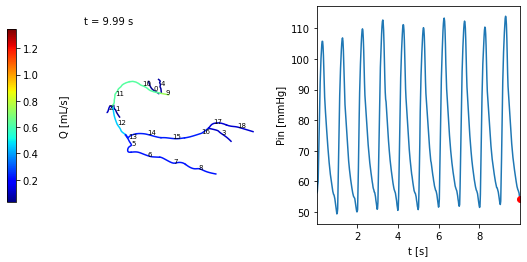

In [9]:
anim = show_animation(solutions, times, pd.t0, chunks, 'Q', resample = 4,
                      inlet_index = bcmanager.inletindex)
from IPython.display import HTML
HTML(anim.to_html5_video())